In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_fe_resnext import FCFEResNeXt
from notebooks.daudt.net_trainer import get_img_trio

In [2]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

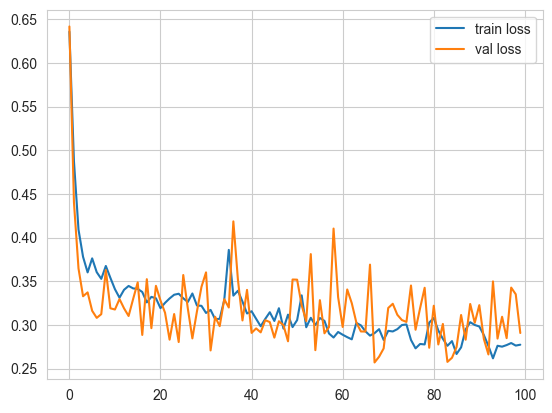

In [3]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [4]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.880439,0.104383,0.579559,0.813675,0.916428,0.962921,0.986694
change accuracy,33.0,0.654747,0.340280,0.000933,0.336364,0.746324,0.946954,1.000000
no change accuracy,33.0,0.876517,0.122018,0.543035,0.785188,0.914543,0.978131,0.998891
precision,33.0,0.240047,0.151844,0.002267,0.125763,0.238957,0.306524,0.536523
recall,33.0,0.613760,0.337347,0.000831,0.304348,0.671961,0.920881,1.000000
dice,33.0,0.306105,0.197085,0.001505,0.173625,0.316486,0.421751,0.694696
kappa,33.0,0.261563,0.179930,-0.005443,0.120878,0.272525,0.339968,0.614945


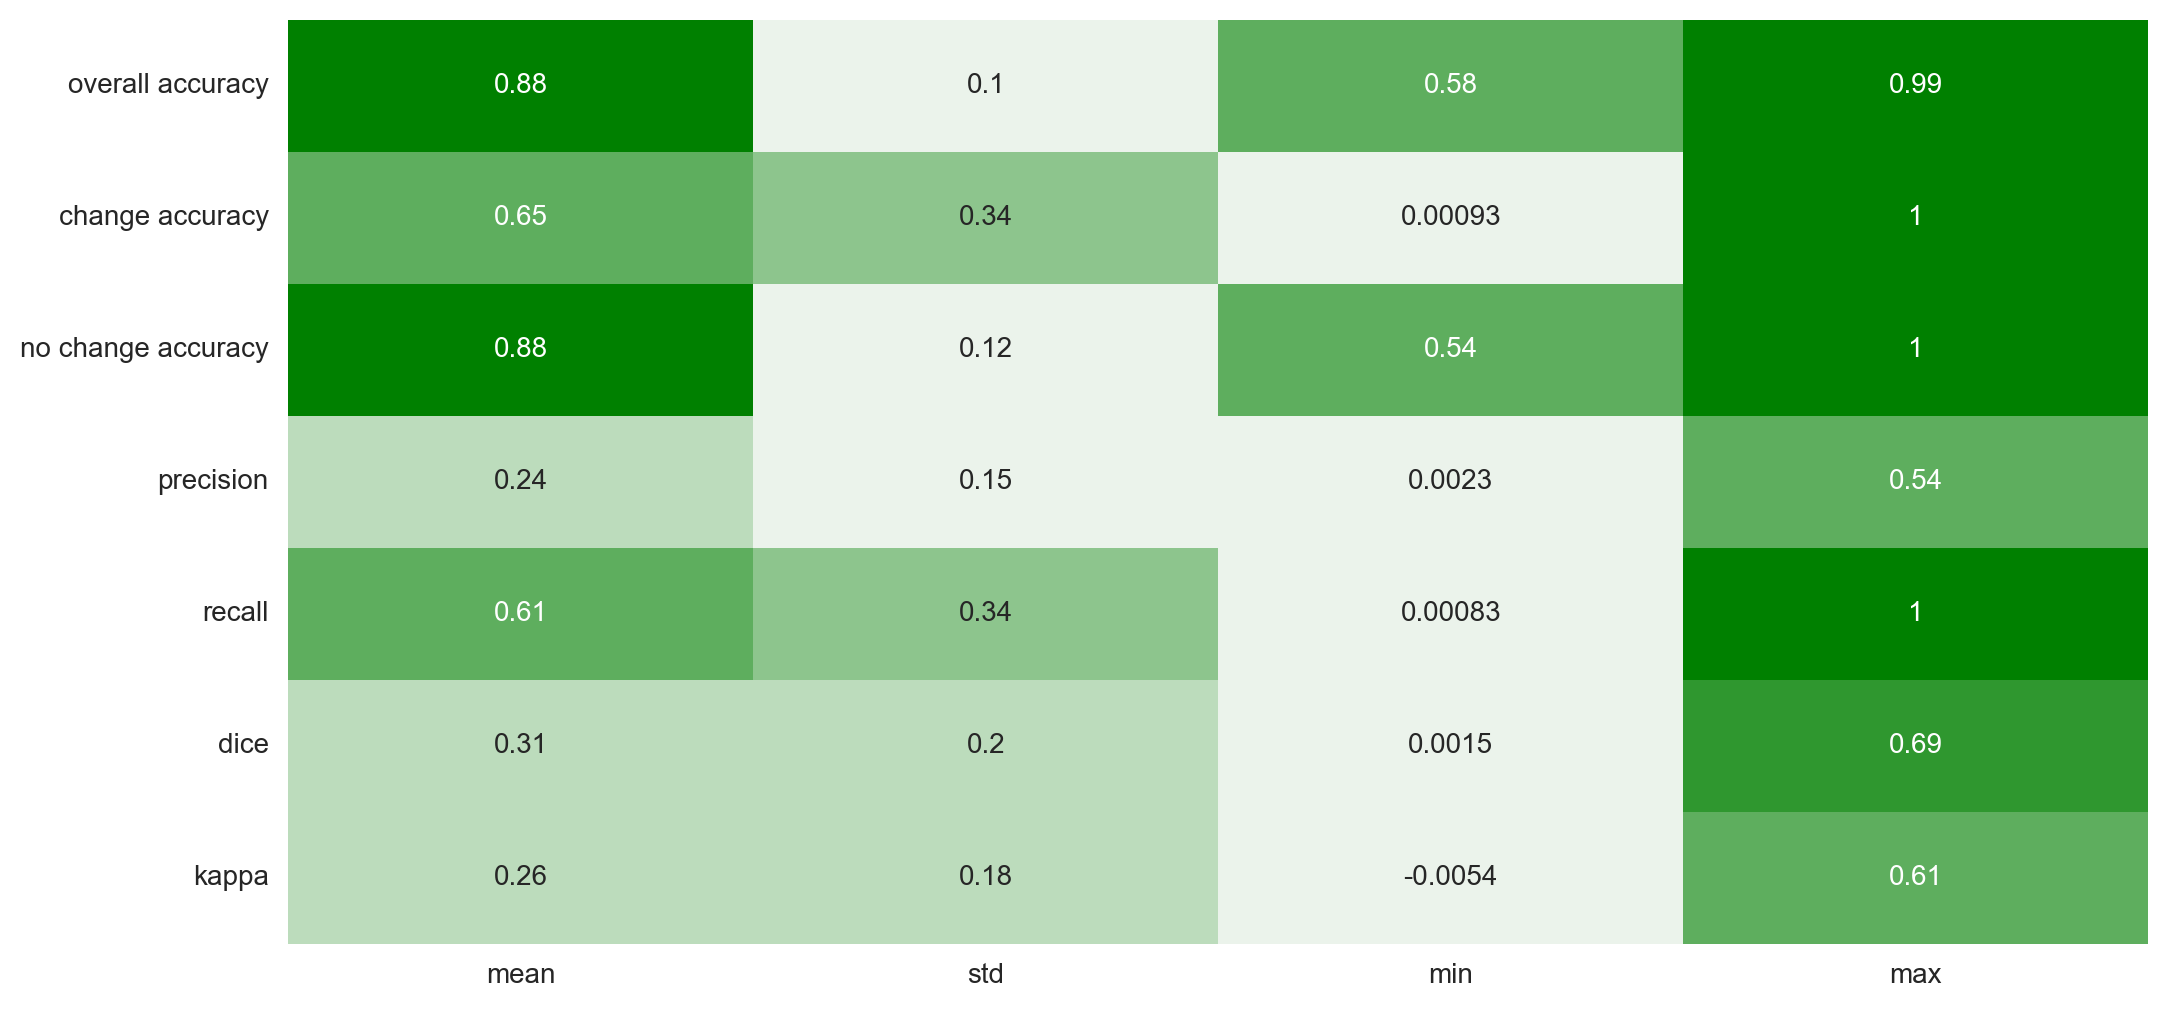

In [5]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [6]:
model = FCFEResNeXt(6, 2)
state = torch.load(f"./best_model.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

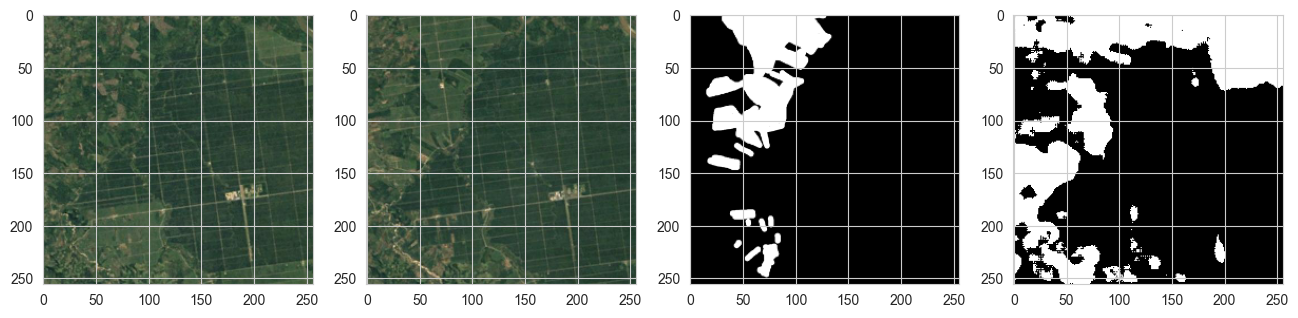

In [11]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    img = torch.cat((img1, img2))
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')